# Chapter 3 Neural Network

## 3.2 활성화 함수
* Sigmoid func<br/>
## σ(x) = $\frac{1}{1 + exp(-x)}$

[-1.  1.  2.]
[False  True  True]
[0 1 1]


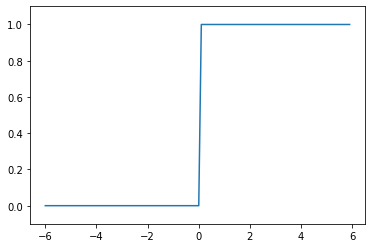

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# step function

# 실수만 받아들이는 case
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

# print(step_function(5))

# 넘파이 배열도 받으들이는 case
def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
print(y)

y = y.astype(np.int)
print(y)

# step func 그리기
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-6.0, 6.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

[0.26894142 0.73105858 0.88079708]


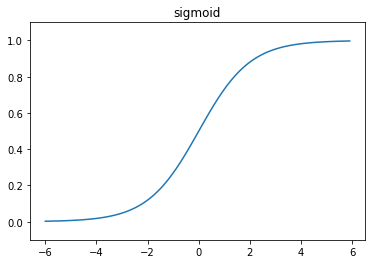

In [33]:
# Sigmoid func

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

# Sigmoid 그리기

x = np.arange(-6.0, 6.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('sigmoid')
plt.show()

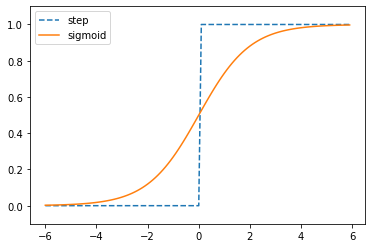

In [34]:
# 시그모이드 함수와 계단 함수 비교

x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, '--', label='step')
plt.plot(x, y2, label='sigmoid')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()

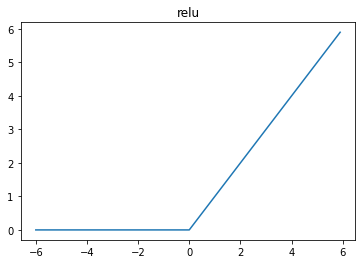

In [35]:
# ReLU
def relu(x):
    return np.maximum(0, x)

x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.title('relu')
plt.show()

## 3.3 다차원 배열의 계산

In [36]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

print(np.ndim(A))

A.shape
A.shape[0]  # <- 인덱스로 행, 열 갯수

B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
B.shape
B.shape[1]

# 행렬 곱
A = np.array([[1,2], [3,4]])
A.shape

B = np.array([[5,6], [7,8]])
print(B)
B.shape

print(np.dot(A, B))

# 배열 자체에도 dot 지원하는듯
print(A.dot(B))

A = np.array([[1,2,3], [4,5,6]])
A.shape

B = np.array([[1,2], [3,4], [5,6]])
B.shape

print(np.dot(A, B))

A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

np.dot(A, B)

# 신경망에서의 행렬 곱
X = np.array([1, 2])
X.shape

W = np.array([[1,3,5], [2,4,6]])
W.shape

Y = np.dot(X, W)
print(Y)

[1 2 3 4]
1
[[1 2]
 [3 4]
 [5 6]]
2
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[22 28]
 [49 64]]
(3, 2)
(2,)
[ 5 11 17]


3층 신경망 구현하기

In [37]:
# 0 -> 1 층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

# t = np.array([[1],[2]])
# t.shape
# # print(X.dot(W1))
# # print(t.dot(W1))

A1 = np.dot(X, W1) + B1
print(A1)

Z1 = sigmoid(A1)

print(A1)
print(Z1)

# 1 -> 2 층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

# 2 -> 3층
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)


구현 정리

In [38]:
import numpy as np

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)
# print(network)

[0.31682708 0.69627909]


범용성있게 재구현

In [39]:
# 망함 나중에 다시...

def init_network(W=[], b=[]):
    network = {}
    
    if len(W) == 0:
        network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    else:
        for i in range(len(W)):
            network[f'W{i}'] = W[i]

    if len(b) == 0:
        network['b1'] = np.array([0.1, 0.2, 0.3])
        network['b2'] = np.array([0.1, 0.2])
        network['b3'] = np.array([0.1, 0.2])
    else:
        for i in range(len(b)):
            network[f'b{i}'] = b[i]

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

Wn = np.array([[[0.3, 0.2, 0.7], [0.2,0.3,0.2]], [[0.4, 0.5, 0.2, 0.4],[0.2,0.3,0.5,0.4]], [[0.3, 0.1, 0.2],[0.4,0.5,0.2]], [[0.1, 0.2],[0.2,0.3]]])
bn = np.array([[[0.1, 0.1, 0.1],[0.2,0.3,0.3]], [[0.1, 0.1, 0.1, 0.2],[0.6,0.7,0.1,0.1]], [[0.1, 0.1, 0.1],[0.1,0.1,0.1]], [[0.1, 0.1],[0.1,0.1]]])

init_network(Wn, bn)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


{'W0': array([list([0.3, 0.2, 0.7]), list([0.2, 0.3, 0.2])], dtype=object),
 'W1': array([list([0.4, 0.5, 0.2, 0.4]), list([0.2, 0.3, 0.5, 0.4])],
       dtype=object),
 'W2': array([list([0.3, 0.1, 0.2]), list([0.4, 0.5, 0.2])], dtype=object),
 'W3': array([list([0.1, 0.2]), list([0.2, 0.3])], dtype=object),
 'b0': array([list([0.1, 0.1, 0.1]), list([0.2, 0.3, 0.3])], dtype=object),
 'b1': array([list([0.1, 0.1, 0.1, 0.2]), list([0.6, 0.7, 0.1, 0.1])],
       dtype=object),
 'b2': array([list([0.1, 0.1, 0.1]), list([0.1, 0.1, 0.1])], dtype=object),
 'b3': array([list([0.1, 0.1]), list([0.1, 0.1])], dtype=object)}

## 3.5 출력층 설계
* 회귀에는 항등 함수, 분류에는 소프트맥스

In [40]:
# softmax
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)


def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

# overflow 방지
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

c = np.max(a)
a - c

np.exp(a-c) / np.sum(np.exp(a-c))

# 특징
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
[0.01821127 0.24519181 0.73659691]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


1.0

## 3.6 손글씨 숫자 인식

In [41]:
# 케라스에서 flatten하고 nomalize 할려면 또 함수 import 해야댐
# from tensorflow import keras

# mnist = keras.datasets.mnist

# (x_train, t_train), (x_test, t_test) = \
#     mnist.load_data()

# # 각 데이터 shape
# print(x_train.shape)
# print(t_train.shape)
# print(x_test.shape)
# print(t_test.shape)

In [42]:
# coding: utf-8

import os, sys

current = os.getcwd()
print(current)

path = '/content/drive/My Drive/DL_from_bottom'
os.chdir(path)

current = os.getcwd()
print(current)

sys.path.append(os.chdir)
sys.path

/content/drive/MyDrive/DL_from_bottom
/content/drive/My Drive/DL_from_bottom


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '..',
 '..',
 '..',
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>,
 <function posix.chdir>]

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


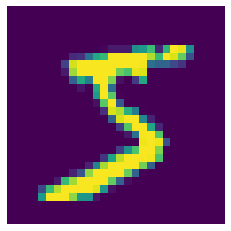

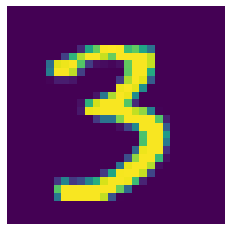

In [43]:
# 한번에
import os, sys
import numpy as np
from PIL import Image
path = '/content/drive/MyDrive/DL_from_bottom'
os.chdir(path)              # 부모는 pardir

sys.path.append(os.chdir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

img2 = x_train[10000].reshape(28, 28)


# plt으로
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

In [49]:
# 추론
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("/content/drive/MyDrive/DL_from_bottom/dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

# 수행

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [55]:
# 배치 처리

x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape
x[0].shape
W1.shape
W2.shape
W3.shape

# 구현
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f"Accuracy : {accuracy_cnt / len(x)}")

Accuracy : 0.9352
